# Finding Heavy Traffic Indicators on I-94 Guided Project

This project will focus on applying data visualization knowledge using matplotlib and seaborn to analyze a traffic dataset for correlations of traffic heaviness and other variables.

The dataset used here contains 2012-2018 westbound [I-94 highway](https://en.wikipedia.org/wiki/Interstate_94) traffic, was compiled by [John Hogue](john.d.hogue@live.com) of General Mills and Social Data Science, and can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). Traffic data is captured on the hour from the automatic traffic recorder (ATR) station 301 that is located roughly between Minneapolis and St Paul, MN. See the following map of the location:

![Station_301_Region](station_301_region.png)

Deviations from Dataquest's instructions are not always noted within the notebook, but steps are made to go beyond the focus of the project.

Sections:

[0.0 Importing Data, Quick Peek](#0.0-Importing-Data,-Quick-Peek) <br>

[2.0 Data Exploration](#2.0-Data-Exploration) <br>
[2.1 Traffic Distribution](#2.1-Traffic-Distribution) <br>
[2.2 Investigating Time of Day](#2.2-Investigating-Time-of-Day) <br>

---

In [16]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

## 0.0 Importing Data, Quick Peek

In [3]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Fortunately there are no null values, and data with just another quick look at the data, we can determine whether/how much cleaning is necessary.

In [27]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_percent,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


- The **holiday** column describes a US national holiday or a regional holiday (ie in Minnesota), and is described from the repo as categorical, but it's not clear what this data looks like based on the above
- Temperature (**temp**) is in Kelvin
- It's not entirely clear what **clouds_all** refers to without the legend from the dataset repository, but the numbers here are percentages. The column name will be updated to reflect this:

In [12]:
traffic.rename(columns={'clouds_all':'clouds_percent'}, inplace=True)

Next just perform a quick check of the **holiday** data to see how it looks:

In [13]:
traffic['holiday'].value_counts()

None                         48143
Labor Day                        7
Thanksgiving Day                 6
New Years Day                    6
Martin Luther King Jr Day        6
Christmas Day                    6
Independence Day                 5
Memorial Day                     5
Columbus Day                     5
Veterans Day                     5
State Fair                       5
Washingtons Birthday             5
Name: holiday, dtype: int64

Ok, so there are several holidays occurring within the dates surveyed. Curiously there are less than 24 hours per holiday identified in the **holiday** column... Given the 2012-2018 data survey, it seems that the holiday column may identify the occurrence of a holiday once per year rather than 24 times per year. FIXME: for more investigation.

## 2.0 Data Exploration

### 2.1 Traffic Distribution

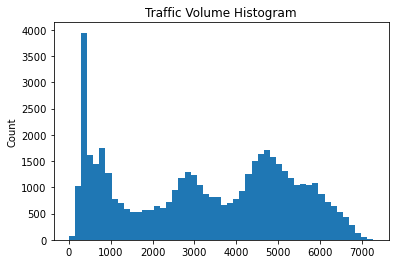

In [24]:
plt.hist(traffic['traffic_volume'],bins=50)
plt.title('Traffic Volume Histogram')
plt.ylabel('Count')
plt.show()

Clearly the distribution is trimodal with peaks around:
- 500, little to no traffic
- 3000. I am not yet certain what this is. I believe it may be weekend commuter traffic, weekday traffic reduced by weather and/or season, or, though unlikely, holiday traffic.
- 5000 and above. This is likely weekday heavy traffic from commuters due to the high frequency 

We will probably investigate all of these.

### 2.2 Investigating Time of Day

Of the many variables that influence the traffic distribution, time of day is one that we can look at. We will simply divide the 24-hour period to identify day and night as follows:
- Day runs from 7am to 7pm
- Night runs from 7pm to 7am

Now